In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:

import numpy as np
import pandas as pd
import math 
import matplotlib.pylab as plt
from statsmodels.tsa.arima_process import arma_acf
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels as sm
import statsmodels.api as smapi
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acovf
from statsmodels.tsa.arima_model import ARIMA

/Users/macbook/opt/anaconda3/envs/Ambiente38/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


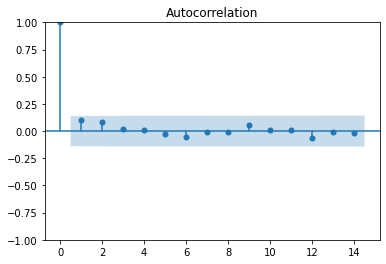

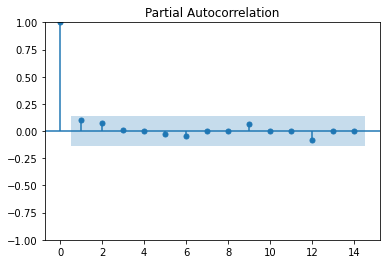

In [5]:
np.random.seed(12345)
y=np.random.normal(0,1,size=200)
grafica_acf=plot_acf(y,lags=((len(y))**0.5),adjusted=False)
grafica_pacf=plot_pacf(y,lags=((len(y))**0.5))

(0.0, 20.0)

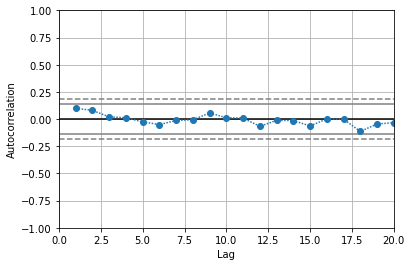

In [6]:
from pandas.plotting import autocorrelation_plot
ax=autocorrelation_plot(y,marker="o",dashes= (1,0,0,1))
ax.set_xlim([0, 20])
#plt.show()

## Filtro Lineal invariante

Se desea simular observaciones que provienen de:
$$X_t=\sum_{j=-k}^{k}a_jZ_{t-j}$$
Note que hay dependencia hasta el rezago $h=2k$.Hay que recordar que que se puede encontrar dependencia hasta de rezago h=2k.

/Users/macbook/opt/anaconda3/envs/Ambiente38/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


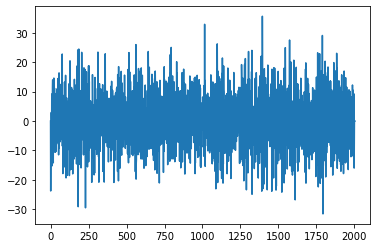

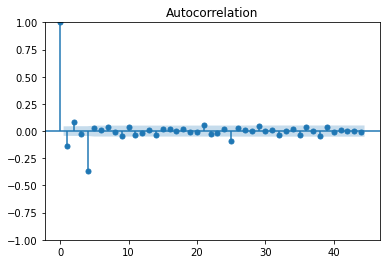

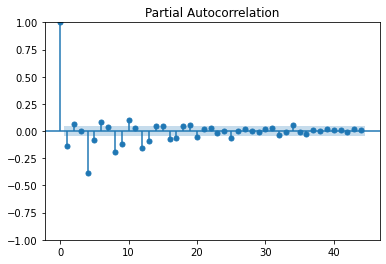

In [7]:
k=2
T=2000+2*k
a=np.random.normal(0,5,size=(2*k+1))
Zt=np.random.normal(0,1,size=T)
Xt=np.zeros(T)
for t in range((k+1), (T-k)):
    Xt[t-k]=sum(a*Zt[(t-k):(t+k+1)])

plt.plot(Xt)
grafica_acf=plot_acf(Xt,lags=((len(Xt))**0.5),adjusted=False)
grafica_pacf=plot_pacf(Xt,lags=((len(Xt))**0.5))

## Caminata Aletoria

/Users/macbook/opt/anaconda3/envs/Ambiente38/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


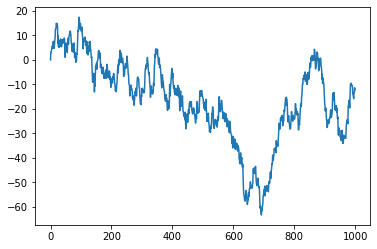

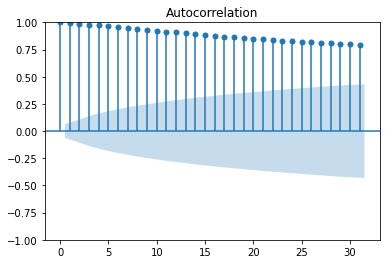

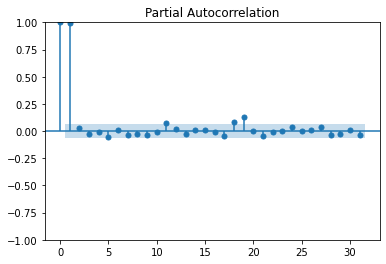

In [9]:
T=1000
sigma=2
Xt=np.random.normal(0,sigma,size=T)
St=np.cumsum(Xt)
plt.plot(St)
grafica_acf=plot_acf(St,lags=((len(St))**0.5),adjusted=False)
grafica_pacf=plot_pacf(St,lags=((len(St))**0.5))

### Series Reales

      rate
0     3.24
1     3.32
2     3.29
3     3.26
4     3.29
...    ...
2462  0.70
2463  0.64
2464  0.59
2465  0.58
2466  0.60

[2467 rows x 1 columns]


pandas.core.frame.DataFrame

2467

/Users/macbook/opt/anaconda3/envs/Ambiente38/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


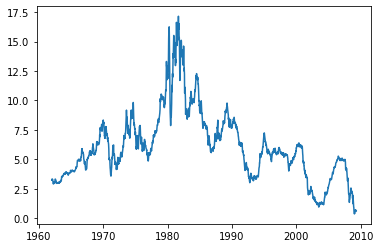

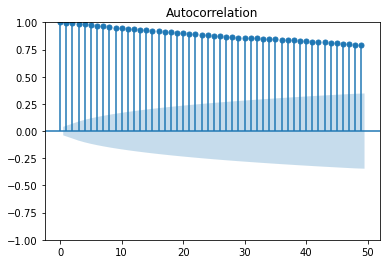

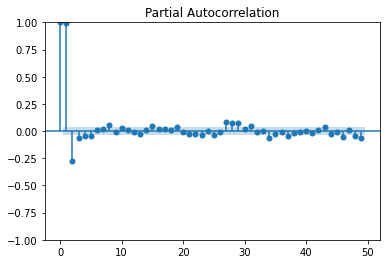

In [10]:
#Usamos Pandas para manejar las bases de Datos
#Importación de los datos
data  = np.loadtxt('w-gs1yr.txt',skiprows=1,usecols = 3)
df_rate=pd.DataFrame({'rate':data})
print(df_rate)
type(df_rate)
len(df_rate)
####Creación de fechas
Fechas = pd.date_range('1/1/1962', periods=len(df_rate), freq='W')
ts_rate=pd.Series(df_rate['rate'].values,Fechas,name='rate')
plt.plot(ts_rate)
grafica_acf=plot_acf(ts_rate,lags=((len(ts_rate))**0.5),adjusted=False)
grafica_pacf=plot_pacf(ts_rate,lags=((len(ts_rate))**0.5))

# Identificación de procesos MA(q)

Note que estamos simulando un proceso
$$X_t=Z_t+0.8Z_{t-1}+0.4Z_{t-2}$$

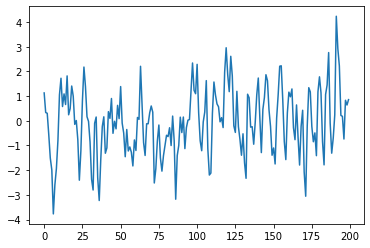

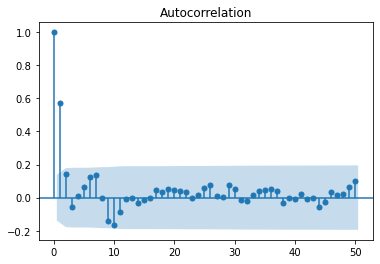

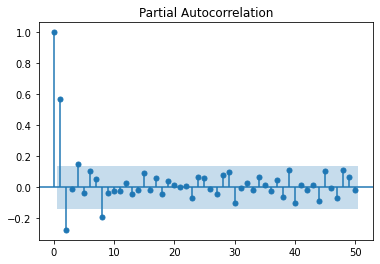

In [5]:
ar=np.array([1]) ####Coeficientes del polinomio autoregresivo.
ma=np.array([1,0.8,0.4])####Coeficientes del polinomio de promedios móviles.

#np.random.seed(186)
Tlength=200
sigma=1###Varianza de ruido
simul = sm.tsa.arima_process.arma_generate_sample(ar=ar,ma=ma,nsample=Tlength,scale=sigma,distrvs = np.random.normal) 


graficaserie=plt.plot(simul)
#acf(simul,nlags=50,unbiased=False)
graficaacf=plot_acf(simul,lags=50,adjusted=False)
#plt.savefig('MAPython.pdf')
graficapacf=plot_pacf(simul,lags=50,method='ldbiased')

In [6]:
help(sm.tsa.arima_process.arma_generate_sample)

Help on function arma_generate_sample in module statsmodels.tsa.arima_process:

arma_generate_sample(ar, ma, nsample, scale=1, distrvs=None, axis=0, burnin=0)
    Simulate data from an ARMA.
    
    Parameters
    ----------
    ar : array_like
        The coefficient for autoregressive lag polynomial, including zero lag.
    ma : array_like
        The coefficient for moving-average lag polynomial, including zero lag.
    nsample : int or tuple of ints
        If nsample is an integer, then this creates a 1d timeseries of
        length size. If nsample is a tuple, creates a len(nsample)
        dimensional time series where time is indexed along the input
        variable ``axis``. All series are unless ``distrvs`` generates
        dependent data.
    scale : float
        The standard deviation of noise.
    distrvs : function, random number generator
        A function that generates the random numbers, and takes ``size``
        as argument. The default is np.random.standard_nor

# Identificación de un AR(p)

Note que en este caso estamos simulando un proceso de la forma
$$X_t+0.7X_{t-1}=Z_t$$

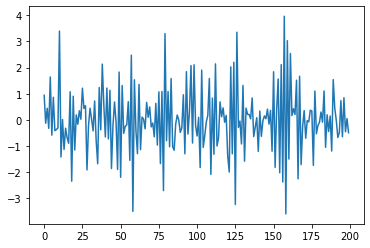

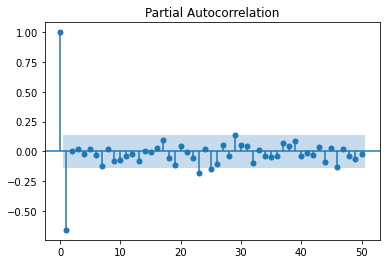

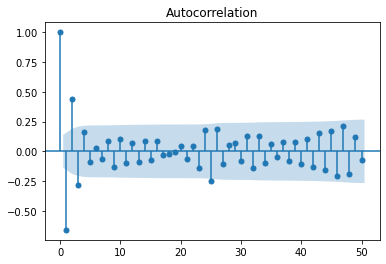

In [7]:
ar=np.array([1,0.7]) ####Coeficientes del polinomio autoregresivo.
ma=np.array([1])

#np.random.seed(2468)
Tlength=200
sigma=1###Varianza de ruido
simular = sm.tsa.arima_process.arma_generate_sample(ar=ar,ma=ma,nsample=Tlength,scale=sigma,distrvs = np.random.normal) 


graficaseriear=plt.plot(simular)
#acf(simul,nlags=50,unbiased=False)
graficapacf=plot_pacf(simular,lags=50,method='ldbiased') ###Se puede usar también em method='ywmle'
plt.savefig('ARPython.pdf')
graficapacf=plot_acf(simular,lags=50,adjusted=False)

# Exploración de un ARMA(p,q) mixto


Se simula un proceso de la siguinte estructura

$$X_t=0.7X_{t-1}=Z_t+0.8Z_{t-1}+0.4Z_{t-2}$$

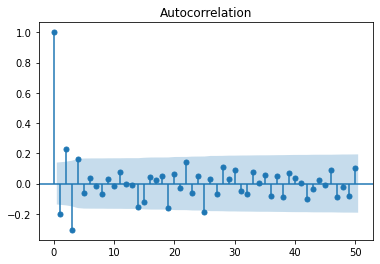

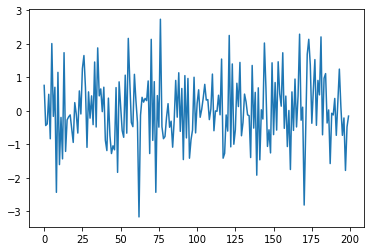

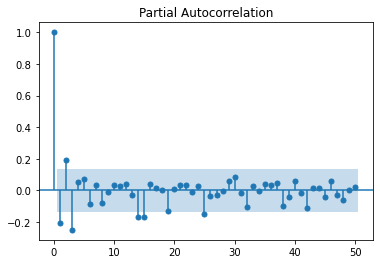

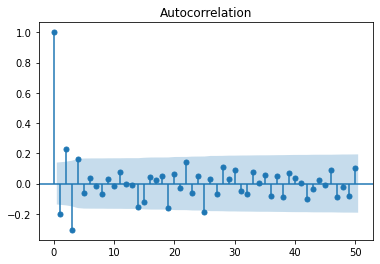

In [8]:
ar=np.array([1,0.7]) ####Coeficientes del polinomio autoregresivo.
ma=np.array([1,0.8,0.4])

#np.random.seed(2468)
Tlength=200
sigma=1###Varianza de ruido
simularma = sm.tsa.arima_process.arma_generate_sample(ar=ar,ma=ma,nsample=Tlength,scale=sigma,distrvs = np.random.normal) 


graficaseriear=plt.plot(simularma)
#acf(simul,nlags=50,unbiased=False)
graficapacf=plot_pacf(simularma,lags=50,method='ldbiased') ###Se puede usar también em method='ywmle'
plt.savefig('ARPython.pdf')
plot_acf(simularma,lags=50,adjusted=False)